### 1.- Environment setup

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from datetime import datetime

seed= 0 #datetime.now().second
env = UnityEnvironment(seed= seed, file_name="./Banana_Linux/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

#Handy functions to help understand the code
def env_reset(mode=True):
    env_info = env.reset(train_mode= mode)[brain_name]
    return env_info.vector_observations[0]

def env_step(action):
    env_info= env.step(action)[brain_name]
    return env_info.vector_observations[0], env_info.rewards[0], env_info.local_done[0]

def env_size():
    env_info = env.reset(train_mode= True)[brain_name]
    return len(env_info.vector_observations[0]), brain.vector_action_space_size


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 2.- Let the agent learn

Episode 100	Average Score: 4.24  
Episode 200	Average Score: 11.45  
Episode 300	Average Score: 12.63  
Episode 309	Average Score: 13.06  
Environment solved in 209 episodes!	Average Score: 13.06


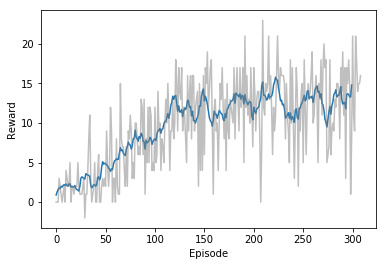

In [2]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from dqn_agent import DQN

NUM_EPISODES = 500
SOLVED_IN= 13

# Hyperparameters
config= {
    "seed": seed,
    "lr": 1e-4,
    "nodes": [128, 256],
    "batch_size": 256,
    "memory_size": 100000,
    "discount": 0.99,
    "tau": 1e-3,
    "epsilon": 0.1,
    "epsilon_end": 0.0001,
    "epsilon_decay": 0.995,
    "learn_every": 3,
    "dqn": "double",       # Options= "simple", "double", "dueling"
    "per": True,          # Prioritized Experience Replay
}

state_size, action_size= env_size()
agent= DQN(state_size, action_size, config= config)

scores_window = deque(maxlen=100)

for episode in range(NUM_EPISODES):
    state = env_reset()
    agent.reset()
    score= 0 
    while True:
        action= agent.act(state)
        next_state, reward, done= env_step(action)# send the action to the environment
        agent.step(state, action, reward, next_state, done)
        score+= reward                                # update the score
        state= next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
            
    agent.update(score)
    scores_window.append(score)       # save most recent score
    mean_w_scores= np.mean(scores_window)
    print('\rEpisode {}\tAverage Score: {:.2f}  '.format(episode+ 1, mean_w_scores), end="")
    if (episode+ 1) % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}  '.format(episode+ 1, mean_w_scores))
    if mean_w_scores >= SOLVED_IN:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format((episode+ 1)-100, mean_w_scores))
        break
        
agent.save('checkpoint.pth')
        
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

smoothed_scores= running_mean(agent.scores, 10)
plt.plot(np.arange(len(smoothed_scores)), smoothed_scores)
plt.plot(np.arange(len(agent.scores)), agent.scores, color='grey', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Reward')


plt.show()

### 3.- See how the agent behaves

In [ ]:
from dqn_agent import DQN

state_size, action_size= env_size()
agent= DQN(state_size, action_size, config= config)
agent.load('checkpoint.pth')

state = env_reset(False)
score = 0                                          # initialize the score
while True:
    action= agent.act(state, False)
    next_state, reward, done= env_step(action)
        
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    print('\rScore: {:.0f} '.format(score), end="")
    if done:                                       # exit loop if episode finished
        break
    
print("\rFinal score: {:.0f}".format(score))

Score: 7 

In [5]:
# Close the environment
env.close()